# Car Accident Severity

In [1]:
import pandas as pd # library for data analsysis
import numpy as np   # library to handle data in a vectorized manner
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data from CSV File

In [2]:
df=pd.read_csv("E:/DataCollisions.csv")

C:\Users\Sampurna Lal\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### A quick view

In [3]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


# Data Preprocessing and selection

### Let's check the shape of our Dataset

In [4]:
df.shape # shape represents no. of rows followed by no. of features(or columns)

(194673, 38)

In [5]:
df.dtypes #types of the features in the dataset

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

### Now, we don't need all of our features for this project so will drop some of them

In [6]:
df = df.drop(['X','Y','OBJECTID','INCKEY', 'COLDETKEY','REPORTNO','INTKEY','LOCATION','EXCEPTRSNCODE','EXCEPTRSNDESC',
              'INCDTTM','INCDATE','SDOT_COLCODE','ST_COLDESC','SDOTCOLNUM','ST_COLCODE', 'ST_COLDESC','CROSSWALKKEY',
              'HITPARKEDCAR','SEVERITYCODE.1','UNDERINFL','STATUS','SEVERITYDESC','JUNCTIONTYPE','SDOT_COLDESC','SEGLANEKEY','PEDROWNOTGRNT'],axis=1)
df.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,Intersection,Angles,2,0,0,2,NaN,Overcast,Wet,Daylight,NaN
1,1,Block,Sideswipe,2,0,0,2,NaN,Raining,Wet,Dark - Street Lights On,NaN
2,1,Block,Parked Car,4,0,0,3,NaN,Overcast,Dry,Daylight,NaN
3,1,Block,Other,3,0,0,3,NaN,Clear,Dry,Daylight,NaN
4,2,Intersection,Angles,2,0,0,2,NaN,Raining,Wet,Daylight,NaN


In [7]:
df.dtypes

SEVERITYCODE       int64
ADDRTYPE          object
COLLISIONTYPE     object
PERSONCOUNT        int64
PEDCOUNT           int64
PEDCYLCOUNT        int64
VEHCOUNT           int64
INATTENTIONIND    object
WEATHER           object
ROADCOND          object
LIGHTCOND         object
SPEEDING          object
dtype: object

### In some of the features data is not available for some rows so we will fill it with 'N' depending upon the features

In [8]:
df['SPEEDING'].fillna("N", inplace=True)
df['INATTENTIONIND'].fillna("N", inplace=True)
df.head(100)

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,Intersection,Angles,2,0,0,2,N,Overcast,Wet,Daylight,N
1,1,Block,Sideswipe,2,0,0,2,N,Raining,Wet,Dark - Street Lights On,N
2,1,Block,Parked Car,4,0,0,3,N,Overcast,Dry,Daylight,N
3,1,Block,Other,3,0,0,3,N,Clear,Dry,Daylight,N
4,2,Intersection,Angles,2,0,0,2,N,Raining,Wet,Daylight,N
...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,Block,Rear Ended,4,0,0,4,Y,Clear,Dry,Daylight,N
96,1,Block,Rear Ended,4,0,0,4,N,Unknown,Wet,Dusk,N
97,1,Block,Sideswipe,8,0,0,2,N,Clear,Dry,Daylight,N
98,1,Block,Other,1,0,0,1,N,Clear,Dry,Dusk,N


In [9]:
df.shape # shape of datset after removing unnecessary features

(194673, 12)

In [10]:
df=df.dropna() # we will drop the rows for which we don't have data,  it takes a less percentage of total dataset

In [11]:
df.isnull().sum() # To check no. of null data

SEVERITYCODE      0
ADDRTYPE          0
COLLISIONTYPE     0
PERSONCOUNT       0
PEDCOUNT          0
PEDCYLCOUNT       0
VEHCOUNT          0
INATTENTIONIND    0
WEATHER           0
ROADCOND          0
LIGHTCOND         0
SPEEDING          0
dtype: int64

### After cleaning the data let's check the shape of our dataset again

In [12]:
df.shape

(187504, 12)

In [13]:
df['ROADCOND'].value_counts() # here we will just look at the different classes of 'ROADCOND' feature

Dry               123730
Wet                47213
Unknown            14005
Ice                 1192
Snow/Slush           992
Other                124
Standing Water       111
Sand/Mud/Dirt         73
Oil                   64
Name: ROADCOND, dtype: int64

## ROADCOND

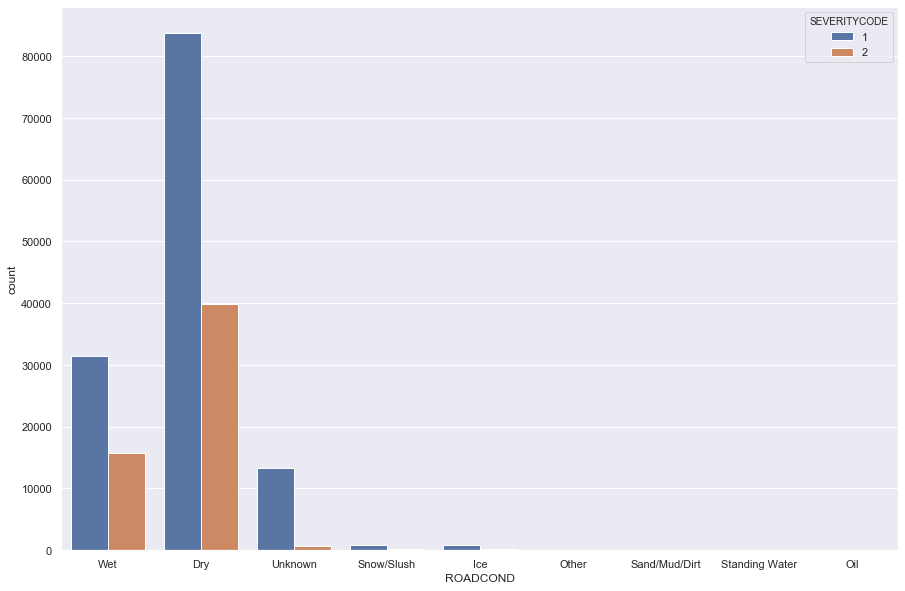

In [14]:
sns.set(rc={'figure.figsize':(15,10)})
sns.countplot(x='ROADCOND', hue='SEVERITYCODE', data=df)

## WEATHER

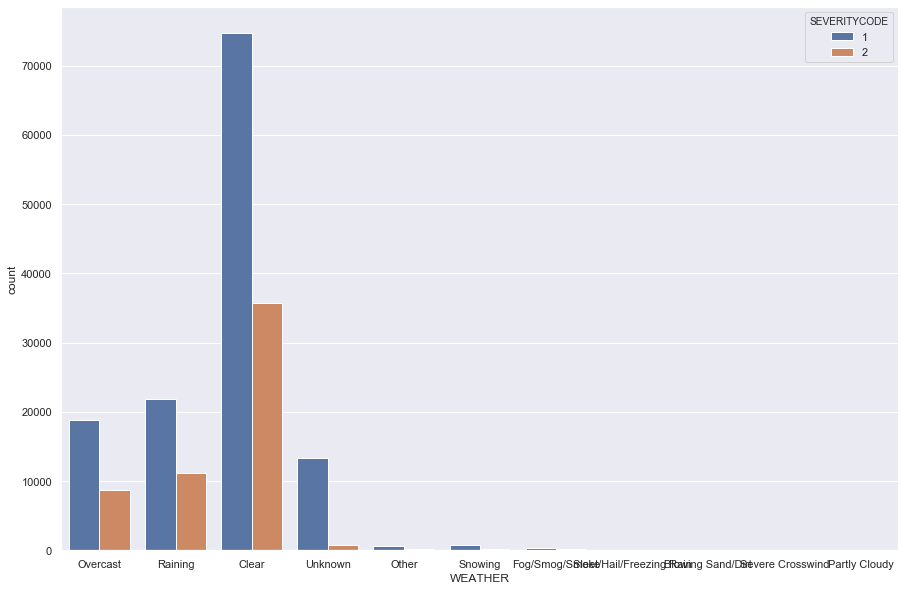

In [15]:
sns.set(rc={'figure.figsize':(15,10)})
sns.countplot(x='WEATHER', hue='SEVERITYCODE', data=df)

## LIGHTCOND

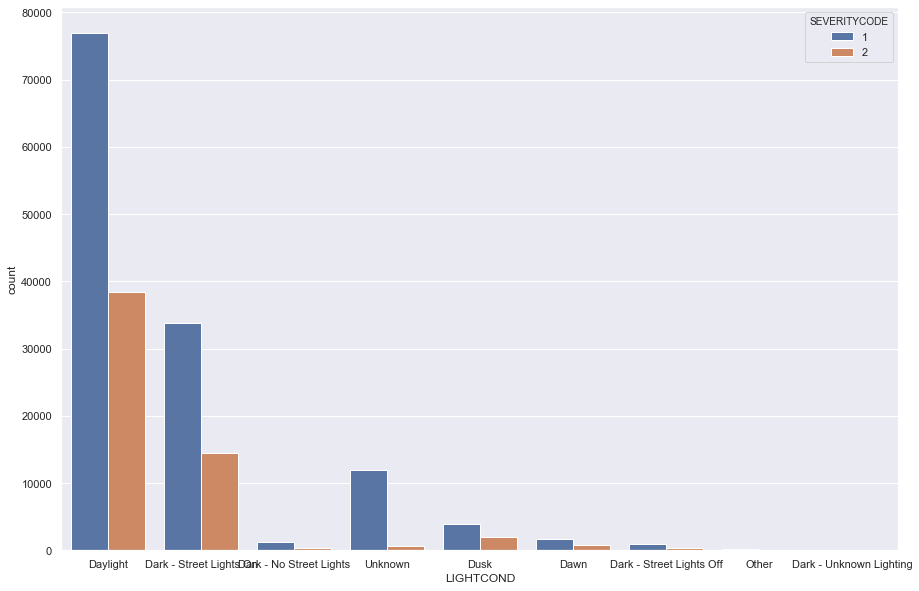

In [16]:
sns.set(rc={'figure.figsize':(15,10)})
sns.countplot(x='LIGHTCOND', hue='SEVERITYCODE', data=df)

## ADDRTYPE

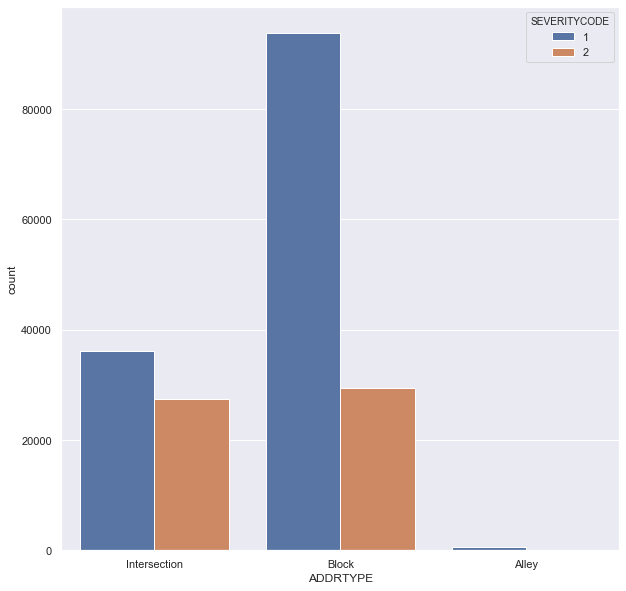

In [17]:
sns.set(rc={'figure.figsize':(10,10)})
sns.countplot(x='ADDRTYPE', hue='SEVERITYCODE', data=df)

## SPEEDING

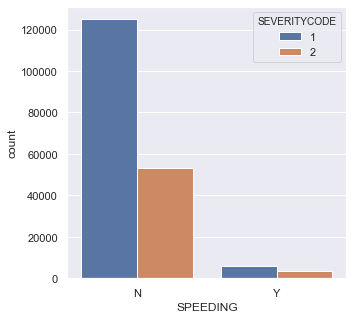

In [18]:
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(x='SPEEDING', hue='SEVERITYCODE', data=df)

## INATTENTIONIND

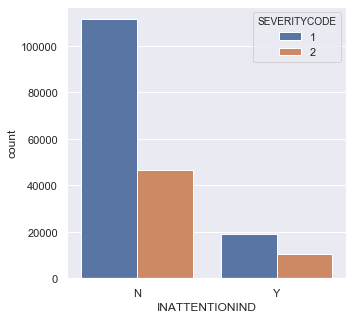

In [19]:
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(x='INATTENTIONIND', hue='SEVERITYCODE', data=df)

## COLLISIONTYPE

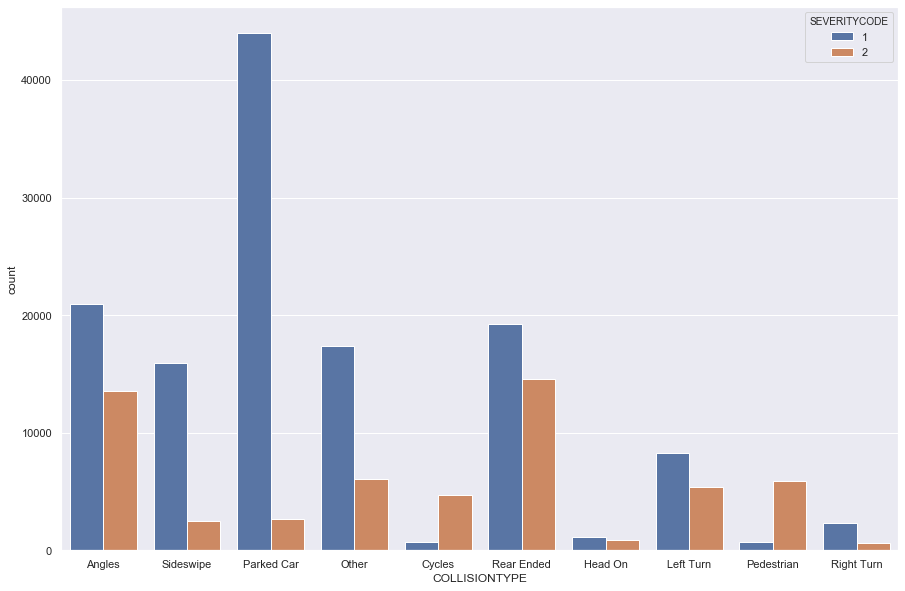

In [20]:
sns.set(rc={'figure.figsize':(15,10)})
sns.countplot(x='COLLISIONTYPE', hue='SEVERITYCODE', data=df)

# Label Encoding

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le =LabelEncoder()
new_df=df[['ADDRTYPE','COLLISIONTYPE','WEATHER','INATTENTIONIND','ROADCOND','LIGHTCOND','SPEEDING']].apply(le.fit_transform)

In [23]:
new_df

,ADDRTYPE,COLLISIONTYPE,WEATHER,INATTENTIONIND,ROADCOND,LIGHTCOND,SPEEDING
0,2,0,4,0,8,5,0
1,1,9,6,0,8,2,0
2,1,5,4,0,0,5,0
3,1,4,1,0,0,5,0
4,2,0,6,0,8,5,0
...,...,...,...,...,...,...,...
194668,1,2,1,0,0,5,0
194669,1,7,6,1,8,5,0
194670,2,3,1,0,0,5,0
194671,2,1,1,0,0,6,0


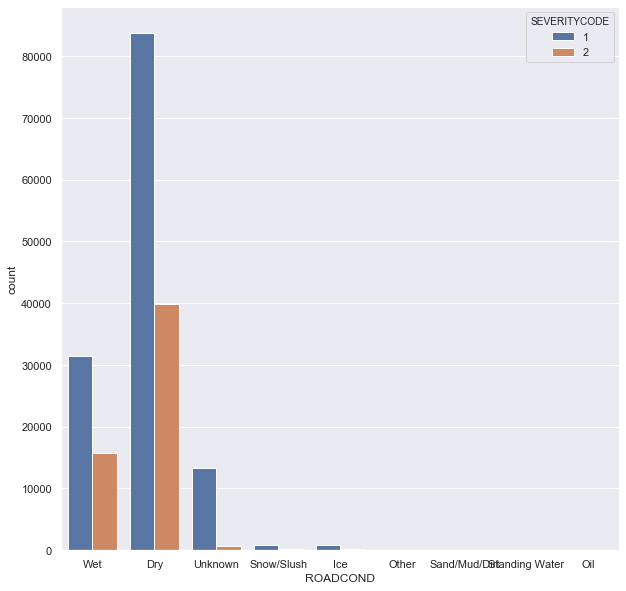

In [24]:
sns.set(rc={'figure.figsize':(10,10)})
sns.countplot(x='ROADCOND', hue='SEVERITYCODE', data=df)

## We will replace the original features with encoded features

In [25]:
df[['ADDRTYPE','COLLISIONTYPE','WEATHER','INATTENTIONIND','ROADCOND','LIGHTCOND','SPEEDING']]=new_df[['ADDRTYPE','COLLISIONTYPE','WEATHER','INATTENTIONIND','ROADCOND','LIGHTCOND','SPEEDING']]

In [26]:
df

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,2,0,2,0,0,2,0,4,8,5,0
1,1,1,9,2,0,0,2,0,6,8,2,0
2,1,1,5,4,0,0,3,0,4,0,5,0
3,1,1,4,3,0,0,3,0,1,0,5,0
4,2,2,0,2,0,0,2,0,6,8,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,1,2,3,0,0,2,0,1,0,5,0
194669,1,1,7,2,0,0,2,1,6,8,5,0
194670,2,2,3,3,0,0,2,0,1,0,5,0
194671,2,2,1,2,0,1,1,0,1,0,6,0


# Normalize Data

In [27]:
X=df[['ADDRTYPE','COLLISIONTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','INATTENTIONIND','WEATHER','ROADCOND','LIGHTCOND','SPEEDING']].values
X[0:5]

array([[2, 0, 2, 0, 0, 2, 0, 4, 8, 5, 0],
       [1, 9, 2, 0, 0, 2, 0, 6, 8, 2, 0],
       [1, 5, 4, 0, 0, 3, 0, 4, 0, 5, 0],
       [1, 4, 3, 0, 0, 3, 0, 1, 0, 5, 0],
       [2, 0, 2, 0, 0, 2, 0, 6, 8, 5, 0]], dtype=int64)

In [28]:
y=df['SEVERITYCODE'].values
y[0:5]

array([2, 1, 1, 1, 2], dtype=int64)

(array([130634.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  56870.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 10 Patch objects>)

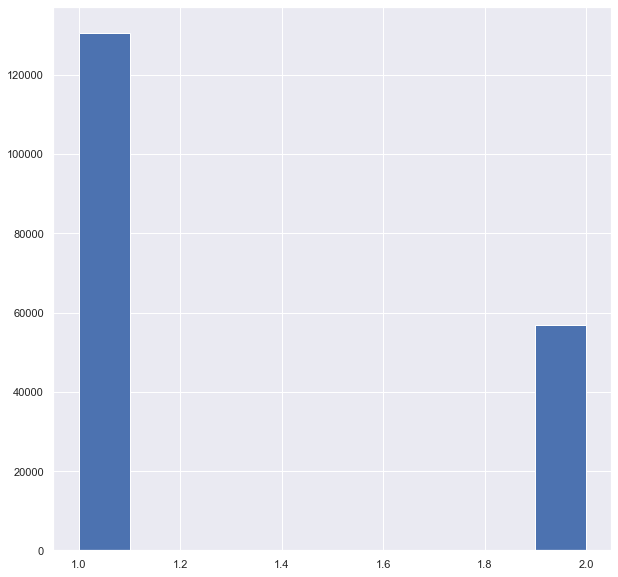

In [29]:
plt.hist(y)

In [30]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 1.38633235, -1.61020838, -0.3408128 , -0.19081036, -0.17240283,
         0.05267307, -0.43285729,  0.33721423,  1.48660325,  0.3620282 ,
        -0.22799291],
       [-0.69655983,  1.61271791, -0.3408128 , -0.19081036, -0.17240283,
         0.05267307, -0.43285729,  1.04644534,  1.48660325, -1.40136278,
        -0.22799291],
       [-0.69655983,  0.18030623,  1.12974361, -0.19081036, -0.17240283,
         1.84025879, -0.43285729,  0.33721423, -0.70675736,  0.3620282 ,
        -0.22799291],
       [-0.69655983, -0.17779669,  0.3944654 , -0.19081036, -0.17240283,
         1.84025879, -0.43285729, -0.72663243, -0.70675736,  0.3620282 ,
        -0.22799291],
       [ 1.38633235, -1.61020838, -0.3408128 , -0.19081036, -0.17240283,
         0.05267307, -0.43285729,  1.04644534,  1.48660325,  0.3620282 ,
        -0.22799291]])

# Train Test Split

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (131252, 11) (131252,)
Test set: (56252, 11) (56252,)


# Classification

## KNN

### Import Library

In [32]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics # for accuracy evaluation

In [33]:
Ks = 25
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.67624262, 0.72758302, 0.72336984, 0.7338228 , 0.72960961,
       0.73551163, 0.73302283, 0.73915594, 0.73711157, 0.7452535 ,
       0.73734267, 0.74544905, 0.74454242, 0.74905781, 0.74413354,
       0.74971557, 0.74331579, 0.74713788, 0.7456446 , 0.74658679,
       0.74555571, 0.74731565, 0.74815118, 0.75138662])

## Plot model accuracy for Different number of Neighbors

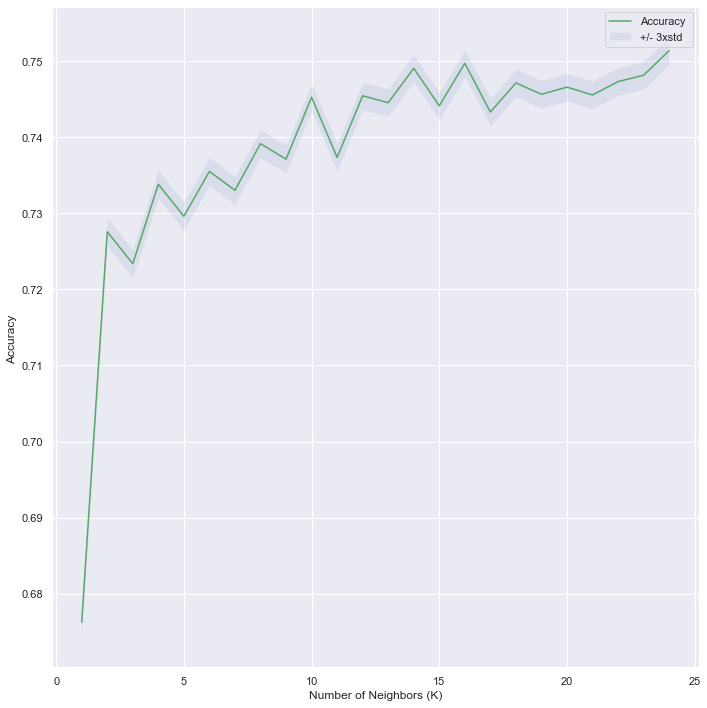

In [34]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [35]:
k=24
neigh=KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=24, p=2,
                     weights='uniform')

In [36]:
yhat=neigh.predict(X_test) # predicting
yhat[0:5]

array([2, 1, 1, 1, 1], dtype=int64)

## Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.001, solver='lbfgs').fit(X_train,y_train)
LR

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
yhatLR = LR.predict(X_test) # predicting

yhatLR

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [39]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.70470049, 0.29529951],
       [0.62522407, 0.37477593],
       [0.79613803, 0.20386197],
       ...,
       [0.8273361 , 0.1726639 ],
       [0.6989845 , 0.3010155 ],
       [0.70443959, 0.29556041]])

## Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
DecisionTree=DecisionTreeClassifier(criterion='entropy',max_depth =9)

In [41]:
DecisionTree.fit(X_train,y_train)
yhatDT=DecisionTree.predict(X_test) #predicting

# Evaluation

## KNN

In [42]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7513866173647159 with k= 24


In [43]:
as_KNN=metrics.accuracy_score(y_test, yhat)
as_KNN

0.7513866173647159

In [44]:
from sklearn.metrics import f1_score
f1_KNN=f1_score(yhat,y_test,average='weighted')
f1_KNN

0.7839196924286409

In [45]:
from sklearn.metrics import jaccard_score
js_KNN=jaccard_score(yhat,y_test)
js_KNN

0.7245746021742555

## Logistic Regression

In [46]:
from sklearn.metrics import log_loss
ll_LR=log_loss(y_test, yhat_prob)
ll_LR

0.5285567734750264

In [47]:
js_LR=jaccard_score(y_test, yhatLR)
js_LR

0.7298606439211918

In [48]:
f1_LR=f1_score(y_test,yhatLR,average='weighted')
f1_LR

0.7020726500043422

In [49]:
as_LR=metrics.accuracy_score(y_test, yhatLR)
as_LR

0.7501599943113134

## Decision Tree

In [50]:
js_DT=jaccard_score(yhatDT,y_test)
js_DT

0.7306484534463809

In [51]:
f1_DT=f1_score(yhatDT,y_test,average='weighted')
f1_DT

0.7913918981997898

In [52]:
as_DT=metrics.accuracy_score(y_test, yhatDT)
as_DT

0.7560264523928039

# Result

In [53]:
!pip install tabulate
print("Installed")

Installed


In [54]:
table = [["KNN",js_KNN,f1_KNN,as_KNN,'NA'],["Decision Tree",js_DT,f1_DT,as_DT,'NA'],
...          ["LogisticRegression",js_LR,f1_LR,as_LR,ll_LR]]

from tabulate import tabulate
from IPython.display import HTML
HTML(tabulate(table, headers= ['Algorithm', 'Jaccard', 'F1-score','Accuracy_Score','LogLoss'], tablefmt='html'))

Algorithm,Jaccard,F1-score,Accuracy_Score,LogLoss
KNN,0.724575,0.78392,0.751387,NA
Decision Tree,0.730648,0.791392,0.756026,NA
LogisticRegression,0.729861,0.702073,0.75016,0.5285567734750264
